In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from skimage import io, transform
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
import tensorflow as tf  # Add this line

print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.19.0


In [5]:
genuine_image_path = "C:\\Users\\rakes\\Desktop\\Signature Verification\\dataset3\\real"
forged_image_path = "C:\\Users\\rakes\\Desktop\\Signature Verification\\dataset3\\forge"


In [6]:
import os
import numpy as np
from skimage import io, transform, color, filters
from scipy.ndimage import median_filter

import cv2


# Function to read and resize image
def read_and_resize(image_path, size=(128, 128)):
    img = io.imread(image_path)  # Read Image (RGB)
    img = transform.resize(img, size)  # Resize
    return img

# Function to convert RGB to Grayscale
def convert_to_grayscale(img):
    return color.rgb2gray(img)

# Function to apply thresholding (Grayscale to Binary)
def apply_thresholding(img):
    threshold = filters.threshold_otsu(img)  # Compute Otsu’s threshold
    binary_img = img < threshold  # Convert to Binary
    return binary_img

# Function to remove noise using Median Filtering
def remove_noise(img, filter_size=3):
    return median_filter(img, size=filter_size)


def load_images(genuine_path, forged_path):
    data = []
    labels = []

    for file in os.listdir(genuine_path):
        if file.endswith(('.png', '.jpg', '.jpeg')):
            img = cv2.imread(os.path.join(genuine_path, file), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128))
            img = cv2.GaussianBlur(img, (3, 3), 0)  # Reduce noise
            img = img / 255.0  # Normalize
            data.append(img)
            labels.append(1)

    for file in os.listdir(forged_path):
        if file.endswith(('.png', '.jpg', '.jpeg')):
            img = cv2.imread(os.path.join(forged_path, file), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128))
            img = cv2.GaussianBlur(img, (3, 3), 0)  # Reduce noise
            img = img / 255.0  # Normalize
            data.append(img)
            labels.append(0)

    data = np.array(data).reshape((-1, 128, 128, 1))
    labels = np.array(labels)

    return data, labels

# Load Data
data, labels = load_images(genuine_image_path, forged_image_path)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

data, labels = load_images(genuine_image_path, forged_image_path)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.save("signature_model.keras")




c:\Users\rakes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.6167 - val_loss: 2.1606
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.6167 - val_loss: 2.2302
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.6500 - val_loss: 2.3543
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.6333 - val_loss: 2.4407
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.6500 - val_loss: 2.4160
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.9933 - loss: 0.0069 - val_accuracy: 0.6667 - val_loss: 2.2936
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.6333 - val_loss: 2.2950
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.6500 - val_loss:

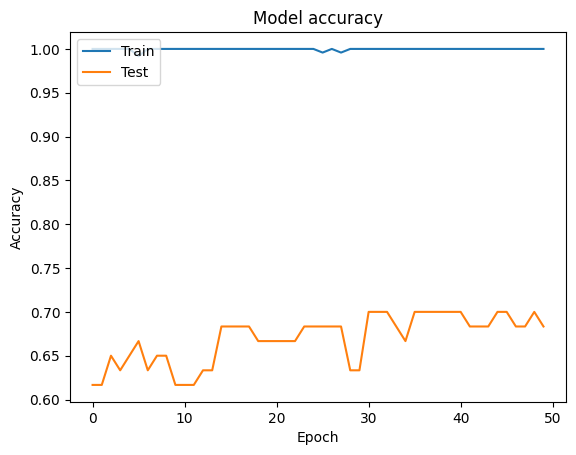

In [15]:
# plot learning curve
def plot_learning_curve(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

plot_learning_curve(history)

In [16]:
def predict_signature(model, img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    img = np.array(img) / 255.0  # Normalize
    img = img.reshape((1, 128, 128, 1))
    prediction = model.predict(img)
    # print("Prediction Score:", prediction[0][0])
    return prediction[0][0] > 0.5


# Function to evaluate model's accuracy on test data
def evaluate_model_accuracy(model, X_test, y_test):
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print("Test accuracy:", test_accuracy)

evaluate_model_accuracy(model, X_test, y_test)

# User input for person_id and image_path
person_id = input("Enter person ID: ")
image_path = input("Enter image path: ")


result = predict_signature(model, image_path)
print("Genuine" if result else "Forged")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7160 - loss: 2.7569
Test accuracy: 0.6833333373069763
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Forged
